# 한강공원 주차 예측

### 초기 세팅

In [196]:
# pip install requests
import warnings
warnings.filterwarnings('ignore')

In [197]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

### 한강공원 API

In [198]:
# import requests
# import json
# import time

# # API 데이터 요청 함수
# def fetch_data(url):
#     # 주어진 URL로 GET 요청을 보내고 응답을 받음
#     response = requests.get(url)
    
#     # 응답 상태 코드가 200(성공)이면 JSON 데이터를 반환
#     if response.status_code == 200:
#         return response.json()
#     else:
#         # 상태 코드가 200이 아니면 오류 메시지 출력
#         print(f"Error: {response.status_code}")
#         return None

# # 실시간 인구 및 혼잡도 정보 추출 함수
# def extract_congestion_info(city_data):
#     # 'LIVE_PPLTN_STTS' 키로부터 실시간 인구 현황 데이터 추출
#     live_ppltn = city_data.get('LIVE_PPLTN_STTS', [])
#     # 첫 번째 인구 정보 항목을 가져오거나 없으면 빈 딕셔너리 반환
#     congestion_info = live_ppltn[0] if live_ppltn else {}
    
#     # 추출한 데이터를 딕셔너리 형태로 반환
#     return {
#         "장소명": city_data.get("AREA_NM", "정보 없음"),  # 장소명
#         "장소 코드": city_data.get("AREA_CD", "정보 없음"),  # 장소 코드
#         "장소 혼잡도 지표": congestion_info.get("AREA_CONGEST_LVL", "정보 없음"),  # 혼잡도 지표
#         "장소 혼잡도 지표 관련 메세지": congestion_info.get("AREA_CONGEST_MSG", "정보 없음"),  # 혼잡도 메세지
#         "실시간 인구 현황": congestion_info.get("AREA_PPLTN_MIN", "정보 없음") + " ~ " + congestion_info.get("AREA_PPLTN_MAX", "정보 없음")  # 실시간 인구 현황
#     }

# # 주차장 중복 제거 및 최신 정보 선택 함수
# def extract_unique_parking_info(city_data):
#     # 'PRK_STTS' 키로부터 주차장 상태 정보 추출
#     parking_data = city_data.get("PRK_STTS", [])
#     unique_parking = {}
    
#     # 주차장 데이터에서 중복된 주차장 정보를 제거하고 최신 정보만 유지
#     for prk in parking_data:
#         key = (prk.get("PRK_NM"), prk.get("PRK_CD"))  # 주차장 이름과 코드로 고유 키 생성
#         if key not in unique_parking or prk.get("CUR_PRK_TIME"):  # 최신 정보가 있으면 업데이트
#             unique_parking[key] = prk
    
#     # 고유한 주차장 정보만 리스트로 반환
#     return list(unique_parking.values())

# # 날씨 현황 정보 추출 함수
# def extract_weather_info(city_data):
#     # 'WEATHER_STTS' 키로부터 날씨 상태 데이터 추출 (리스트일 경우 첫 번째 항목 선택)
#     weather_data = city_data.get('WEATHER_STTS', [])
#     weather_info = weather_data[0] if weather_data else {}  # 첫 번째 항목이 있으면 가져오고, 없으면 빈 딕셔너리
    
#     # 추출한 날씨 정보를 딕셔너리 형태로 반환
#     return {
#         "기온": weather_info.get("TEMP", "정보 없음"),  # 기온
#         "체감 온도": weather_info.get("SENSIBLE_TEMP", "정보 없음"),  # 체감 온도
#         "습도": weather_info.get("HUMIDITY", "정보 없음"),  # 습도
#         "풍향": weather_info.get("WIND_DIRCT", "정보 없음"),  # 바람 방향
#         "통합대기환경지수": weather_info.get("AIR_IDX_MVL", "정보 없음"),  # 통합 대기 환경 지수
#         "통합대시환경지수메세지": weather_info.get("AIR_MSG", "정보 없음"),  # 통합 대기 환경 지수 메시지
#     }

# # 전체 데이터 처리 함수
# def process_city_data(data):
#     # 'CITYDATA' 키로부터 도시 데이터 추출
#     city_data = data.get('CITYDATA', {})
    
#     # 인구 및 혼잡도 정보 추출
#     congestion_info = extract_congestion_info(city_data)
#     # 중복된 주차장 정보 처리 후 고유한 주차장 정보 리스트 추출
#     unique_parking_list = extract_unique_parking_info(city_data)
#     # 날씨 현황 정보 추출
#     weather_info = extract_weather_info(city_data)
    
#     # 필요한 모든 데이터를 딕셔너리 형태로 반환
#     return {
#         **congestion_info,  # 인구 및 혼잡도 정보
#         "전체도로소통평균속도": city_data.get("ROAD_TRAFFIC_SPD", "정보 없음"),  # 도로 소통 평균 속도
#         "도로소통현황 업데이트 시간": city_data.get("ROAD_TRAFFIC_TIME", "정보 없음"),  # 도로 소통 현황 업데이트 시간
#         "전체도로소통평균현황 메세지": city_data.get("ROAD_MSG", "정보 없음"),  # 도로 소통 현황 메시지
#         "주차장 현황": unique_parking_list,  # 주차장 현황
#         **weather_info  # 날씨 현황 정보
#     }

# # 결과 출력 함수
# def print_data(data):
#     # 처리된 데이터를 읽기 쉬운 형식으로 출력
#     print("\n추출한 데이터 (row 형태):")
#     print(json.dumps(data, ensure_ascii=False, indent=4))

# # 실행 함수
# def main(park_name):
#     # 시작 시간 기록
#     start_time = time.time()

#     # API URL 설정 (JSON 형식)
#     url = f'http://openapi.seoul.go.kr:8088/434675486868617235394264587a4e/json/citydata/1/1000/{park_name}'

#     # 데이터 가져오기
#     data = fetch_data(url)
    
#     # 데이터가 유효하면 처리 후 출력
#     if data:
#         processed_data = process_city_data(data)
#         print_data(processed_data)

#     # 종료 시간 기록 및 실행 시간 출력
#     end_time = time.time()
#     print(f"\n코드 실행 시간: {end_time - start_time:.4f}초")

# # 프로그램 실행
# if __name__ == "__main__":
#     main()

---
## Data 
    Target
- 주차 가능 공간 수
----
    Feature
- 요일
- 시간
- 날씨
- 행사 일정
- 인근 대중교통 이용량
- 주변 인구 밀집도
- 주차 면수
- 이용시간

In [199]:
# 데이터 불러오기
import pandas as pd

# 데이터 일별 주차대수 및 이용시간 현황
df_day = pd.read_csv("../Data/한강공원 주차장 일별 이용 현황.csv", encoding='euc-kr', index_col=False)
# 데이터 월별 공원 
df_month = pd.read_csv("../Data/서울시 한강공원 월별 이용객 현황.csv", encoding='euc-kr', index_col=False)

In [200]:
# 데이터 확인하기
print(f"한강공원 주차장 일별 데이터 :")
print(df_day.info())

한강공원 주차장 일별 데이터 :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45277 entries, 0 to 45276
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지구별     45277 non-null  object
 1   주차장명    45277 non-null  object
 2   주차대수    45277 non-null  int64 
 3   이용시간    45277 non-null  int64 
 4   날짜      45277 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.7+ MB
None


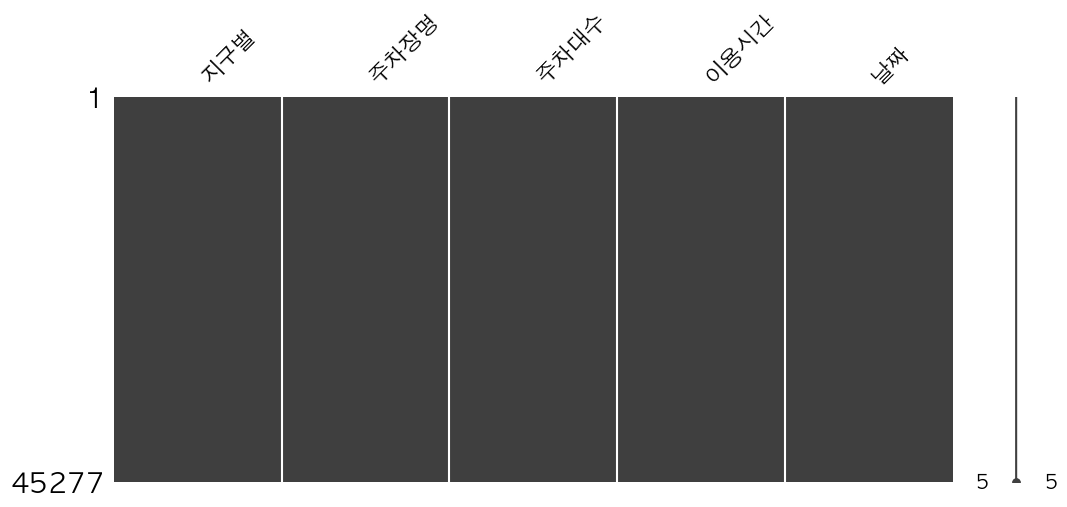

In [201]:
# 결측치 시각화
# train NaN값 시각화
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df_day, figsize=(12, 5))

plt.show()

> 주차장 일별 데이터는 결측치가 없는 것을 확인 할 수 있다.

In [202]:
# 날짜 컬럼을 날짜 형식으로 전환
df_day['날짜'] = pd.to_datetime(df_day['날짜'], format= '%Y/%m/%d')

# 일별 날짜 컬럼을 연,월,일 컬럼으로 분리
df_day['연도'] = df_day['날짜'].dt.year
df_day['월'] = df_day['날짜'].dt.month
df_day['일'] = df_day['날짜'].dt.day

df_day

,지구별,주차장명,주차대수,이용시간,날짜,연도,월,일
0,PLT-005,뚝섬1주차장,273,22891,2024-11-10,2024,11,10
1,PLT-011,잠실1주차장,1059,66361,2024-11-10,2024,11,10
2,PLT-001,강서1주차장,329,26875,2024-11-10,2024,11,10
3,PLT-008,여의도5주차장,229,22509,2024-11-10,2024,11,10
4,PLT-008,여의도2주차장,1934,150135,2024-11-10,2024,11,10
...,...,...,...,...,...,...,...,...
45272,PLT-008,여의도1주차장,873,221484,2020-01-16,2020,1,16
45273,PLT-001,강서1주차장,28,347,2020-01-16,2020,1,16
45274,PLT-008,여의도1주차장,114,6073,2020-01-15,2020,1,15
45275,PLT-001,강서1주차장,12,68,2020-01-15,2020,1,15


In [203]:
# pip install holidays

### 요일 정보
    0 : 월요일
    1 : 화요일
    2 : 수요일
    3 : 목요일
    4 : 금요일
    5 : 토요일
    6 : 일요일
### 휴일여부 정보
    0 : 평일
    1 : 주말
    2 : 휴일

In [204]:
# 평일 휴일로 분리 및 요일 변환 
import holidays

# 대한민국 공휴일 가져오기
kr_holidays = holidays.KR(years=range(2020,2025))

# 요일 변환
weekday_map = {0 : 0, 1 : 1, 2 : 2, 3: 3, 4: 4, 5: 5, 6: 6}

# 요일 숫자를 요일 이름으로 변환
df_day['요일'] = df_day['날짜'].dt.weekday.map(weekday_map)

# 날짜가 공휴일인지를 체크하는 함수 추가
df_day['휴일여부'] = df_day['날짜'].apply(lambda x: 2 if x in kr_holidays else (1 if x.weekday() >= 5 else 0))

# 데이터 확인
df_day

,지구별,주차장명,주차대수,이용시간,날짜,연도,월,일,요일,휴일여부
0,PLT-005,뚝섬1주차장,273,22891,2024-11-10,2024,11,10,6,1
1,PLT-011,잠실1주차장,1059,66361,2024-11-10,2024,11,10,6,1
2,PLT-001,강서1주차장,329,26875,2024-11-10,2024,11,10,6,1
3,PLT-008,여의도5주차장,229,22509,2024-11-10,2024,11,10,6,1
4,PLT-008,여의도2주차장,1934,150135,2024-11-10,2024,11,10,6,1
...,...,...,...,...,...,...,...,...,...,...
45272,PLT-008,여의도1주차장,873,221484,2020-01-16,2020,1,16,3,0
45273,PLT-001,강서1주차장,28,347,2020-01-16,2020,1,16,3,0
45274,PLT-008,여의도1주차장,114,6073,2020-01-15,2020,1,15,2,0
45275,PLT-001,강서1주차장,12,68,2020-01-15,2020,1,15,2,0


> 데이터의 '이용시간' 컬럼이 분 단위이기 때문에 분 단위를 차랑 평균당 시간으로 변환시켜준다.

In [205]:
# 시간 변환
df_day['주차장 이용 시간(H)'] = (df_day['이용시간'] / 60)

In [206]:
# 데이터 확인
df_day

,지구별,주차장명,주차대수,이용시간,날짜,연도,월,일,요일,휴일여부,주차장 이용 시간(H)
0,PLT-005,뚝섬1주차장,273,22891,2024-11-10,2024,11,10,6,1,381.516667
1,PLT-011,잠실1주차장,1059,66361,2024-11-10,2024,11,10,6,1,1106.016667
2,PLT-001,강서1주차장,329,26875,2024-11-10,2024,11,10,6,1,447.916667
3,PLT-008,여의도5주차장,229,22509,2024-11-10,2024,11,10,6,1,375.150000
4,PLT-008,여의도2주차장,1934,150135,2024-11-10,2024,11,10,6,1,2502.250000
...,...,...,...,...,...,...,...,...,...,...,...
45272,PLT-008,여의도1주차장,873,221484,2020-01-16,2020,1,16,3,0,3691.400000
45273,PLT-001,강서1주차장,28,347,2020-01-16,2020,1,16,3,0,5.783333
45274,PLT-008,여의도1주차장,114,6073,2020-01-15,2020,1,15,2,0,101.216667
45275,PLT-001,강서1주차장,12,68,2020-01-15,2020,1,15,2,0,1.133333


> 날씨 컬럼 추가하기

In [207]:
# 날씨 CSV FILE 불러오기
weather_seoul = pd.read_csv("../Data/서울날씨20-24.csv", encoding='euc-kr')

# Data 확인하기
weather_seoul.sort_values(by='일시', axis=0,ascending=False, inplace=True)
weather_seoul

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),일강수량(mm),평균 이슬점온도(°C),평균 상대습도(%)
1762,108,서울,2024-11-10,14.4,10.3,536.0,21.0,1520,NaN,NaN,7.4,64.0
1761,108,서울,2024-11-09,12.9,6.8,607.0,20.3,1436,NaN,NaN,3.9,55.8
1760,108,서울,2024-11-08,10.2,3.1,629.0,18.1,1501,NaN,NaN,0.1,50.8
1759,108,서울,2024-11-07,7.8,1.6,707.0,15.7,1515,NaN,NaN,-3.0,48.1
1758,108,서울,2024-11-06,7.5,4.1,628.0,12.5,1430,NaN,NaN,-3.6,46.1
...,...,...,...,...,...,...,...,...,...,...,...,...
4,108,서울,2020-01-18,0.3,-4.1,802.0,5.9,1503,NaN,NaN,-10.0,48.1
3,108,서울,2020-01-17,-0.6,-4.8,720.0,4.9,1449,NaN,NaN,-11.7,43.9
2,108,서울,2020-01-16,-1.7,-5.5,816.0,3.2,1430,NaN,NaN,-13.0,43.0
1,108,서울,2020-01-15,-2.7,-6.4,722.0,2.2,1510,NaN,NaN,-13.4,44.8


In [208]:
# 일시 컬럼 날짜 컬럼명 KEY 값 연동
weather_seoul['날짜'] = weather_seoul['일시']

In [221]:
# 데이터 확인
weather_seoul['날짜'] = pd.to_datetime(weather_seoul['날짜'], format='%Y-%m-%d')

In [225]:
# 날짜를 기준으로 병합
df_merged = pd.merge(df_day, weather_seoul[['날짜', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '평균 상대습도(%)']],
                     how='left', left_on='날짜', right_on='날짜')

# 병합 결과 확인
df_merged

,지구별,주차장명,주차대수,이용시간,날짜,연도,월,일,요일,휴일여부,주차장 이용 시간(H),평균기온(°C),최저기온(°C),최고기온(°C),평균 상대습도(%)
0,PLT-005,뚝섬1주차장,273,22891,2024-11-10,2024,11,10,6,1,381.516667,14.4,10.3,21.0,64.0
1,PLT-011,잠실1주차장,1059,66361,2024-11-10,2024,11,10,6,1,1106.016667,14.4,10.3,21.0,64.0
2,PLT-001,강서1주차장,329,26875,2024-11-10,2024,11,10,6,1,447.916667,14.4,10.3,21.0,64.0
3,PLT-008,여의도5주차장,229,22509,2024-11-10,2024,11,10,6,1,375.150000,14.4,10.3,21.0,64.0
4,PLT-008,여의도2주차장,1934,150135,2024-11-10,2024,11,10,6,1,2502.250000,14.4,10.3,21.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45272,PLT-008,여의도1주차장,873,221484,2020-01-16,2020,1,16,3,0,3691.400000,-1.7,-5.5,3.2,43.0
45273,PLT-001,강서1주차장,28,347,2020-01-16,2020,1,16,3,0,5.783333,-1.7,-5.5,3.2,43.0
45274,PLT-008,여의도1주차장,114,6073,2020-01-15,2020,1,15,2,0,101.216667,-2.7,-6.4,2.2,44.8
45275,PLT-001,강서1주차장,12,68,2020-01-15,2020,1,15,2,0,1.133333,-2.7,-6.4,2.2,44.8


> 중간 저장

In [230]:
df_merged.to_csv("../Data/서울 날씨 컬럼 추가")

In [234]:
df_month.columns

Index(['현황 일련번호', '공원 코드', '공원명', '공원 시명', '공원 구명', '공원 지번 주소', '공원 도로명 주소',
       '등록자 일련번호', '등록 일시', '수정자 일련번호', '수정 일시', '일반이용자(아침)', '일반이용자(낮)',
       '일반이용자(저녁)', '자전거', '인라인', 'pm(개인형이동장치)', '주요행사', '마라톤', '운동시설', '야구장',
       '론볼링장', '트랙구장', '롤러장', '자전거공원', '외국인', '수상시설', '수영장/물놀이장', '빙상장/눈설매장',
       '전망쉼터', '캠핑장', '자연학습장', '음악분수', '키즈랜드', '장미원', 'x게임장', '자벌레', '달빛무지개',
       '세빛섬', '수상무대', '계절,녹음수광장', '천상계단', '피아노물길', '멀티프라자', '서울색공원', '물빛광장',
       '너플들판테라스', '골프장', '여의도샛강', '여의도시민 요트나루', '평화공원브릿지', '거울분수', '강변물놀이장',
       '강변프롬나드', '난지 하늘다리', '갈대숲탐장로', '꿀벌숲', '치유의숲', '그라스정원', '노들섬', '습지생태공원',
       '현황 일시'],
      dtype='object')

### 한강공원 월별 이용객 데이터 불러오기

---
### Train, Test 데이터 분리

In [229]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# 데이터 프레임 생성

df = pd.DataFrame({
    '주차장명' : df_day['주차장명'],
    '주차대수' : df_day['주차대수'],
    '주차장 이용시간' : df_day['주차장 이용 시간'],
    '날짜' : df_day['날짜'],
    '연도' : df_day['연도'],
    '월' : df_day['월'],
    '일' : df_day['일'],
    '요일' : df_day['요일'],
    '휴일여부' : df_day['휴일여부']
})

# 주차 공간 비율 계산
df['주차공간비율'] = df['주차장 이용시간'] / df['주차대수']

features = ['주차대수', '요일', '휴일여부']
target = '주차공간비율'

# 데이터 준비
x = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
                                        x,
                                        y,
                                        test_size=0.2,
                                        random_state=42
)

# 모델 학습
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# 예측
y_pred = rf.predict(X_test)

# 예측 결과 확인
print(f"실제값: {y_test.values}")
print(f"예측값: {y_pred}")

# # Data Scaler instance 생성
# scaler = StandardScaler()
# # 데이터 스케일링
# df_scaled = scaler.fit_transform(df[features])

# # KMeans instance 생성
# km = KMeans()
# # K-means 군집화
# km = KMeans(n_clusters=3, random_state=42)
# df['K'] = km.fit_predict(df_scaled)

# 데이터 확인
df

KeyError: '주차장 이용 시간'

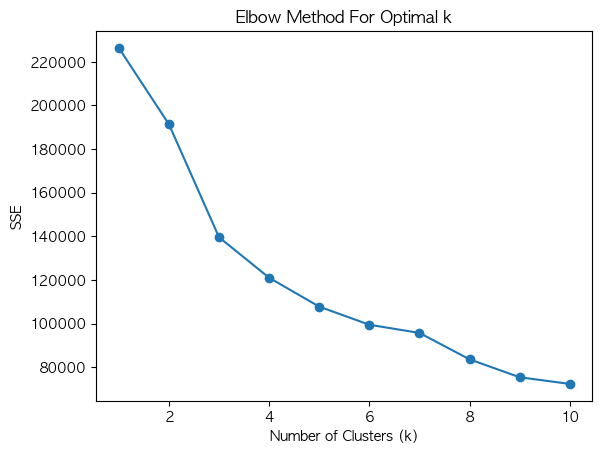

In [ ]:
# KMeans 군집화 - 사용하고 싶다면 주차 이용률 군집화 가능
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, random_state=42)
df['K'] = km.fit_predict(X_scaled)  # 군집 결과 추가

import matplotlib.pyplot as plt

# Elbow method 
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# 엘보우 그래프
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.show()

---